In [1]:
# Import Libararies
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Fashion Mnist Dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print("Training data shape:", train_images.shape)
print("Testing data shape:", test_images.shape)
print("Labels range:", np.unique(train_labels))

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Labels range: [0 1 2 3 4 5 6 7 8 9]


In [4]:
# Class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

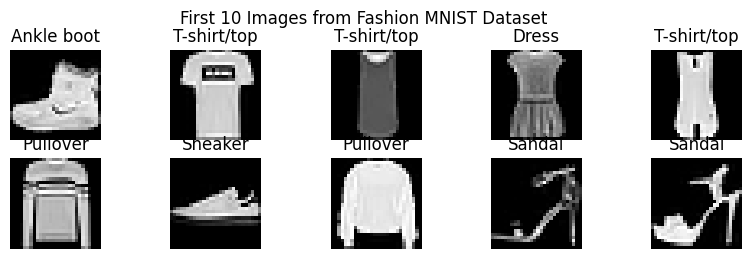

In [5]:
# Visualize 10 images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(3, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.suptitle("First 10 Images from Fashion MNIST Dataset")
plt.show()

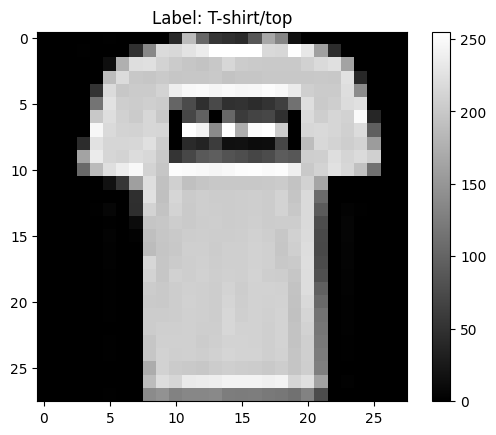


Pixel values of image at index 1:
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214

In [6]:
# Display an image with pixel val
index = 1
plt.imshow(train_images[index], cmap='gray')
plt.title(f"Label: {class_names[train_labels[index]]}")
plt.colorbar()
plt.show()

print(f"\nPixel values of image at index {index}:")
print(train_images[index])

In [7]:
# Preprocess data
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0

print("\nAfter normalization:")
print("Pixel value range:", train_images.min(), "to", train_images.max())


After normalization:
Pixel value range: 0.0 to 1.0


In [8]:
# Build Simple CNN
model_fashion = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model_fashion.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,359,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,378,826 (9.07 MB)

 Trainable params: 2,378,826 (9.07 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile & Train Model
model_fashion.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

history_fashion = model_fashion.fit(train_images, train_labels, epochs=5,
                                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 170s 90ms/step - accuracy: 0.8195 - loss: 0.5099 - val_accuracy: 0.8876 - val_loss: 0.3026
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 199s 88ms/step - accuracy: 0.9106 - loss: 0.2396 - val_accuracy: 0.9062 - val_loss: 0.2590
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 208s 91ms/step - accuracy: 0.9359 - loss: 0.1754 - val_accuracy: 0.9151 - val_loss: 0.2418
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 173s 92ms/step - accuracy: 0.9527 - loss: 0.1260 - val_accuracy: 0.9133 - val_loss: 0.2631
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 200s 92ms/step - accuracy: 0.9693 - loss: 0.0873 - val_accuracy: 0.9165 - val_loss: 0.2837


In [10]:
# As the model is too much overfitting, we will be using Pooling, Padding & Data Augmentation to make it a good standing model.

In [11]:
x_train, y_train = train_images, train_labels
x_test, y_test = test_images, test_labels

In [12]:
# Resize the image
x_train = tf.image.resize(x_train, [32, 32])
x_test = tf.image.resize(x_test, [32, 32])

In [13]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

In [14]:
# Build a CNN Model
model_deep = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model_deep.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,234 (1.36 MB)

 Trainable params: 356,234 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Compile the model
model_deep.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [16]:
# Train the model
batch_size = 64
history_deep = model_deep.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    validation_data=(x_test, y_test),
    epochs=5
)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 141s 148ms/step - accuracy: 0.6759 - loss: 0.8594 - val_accuracy: 0.8273 - val_loss: 0.4467
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 132s 141ms/step - accuracy: 0.8247 - loss: 0.4592 - val_accuracy: 0.8458 - val_loss: 0.4059
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 132s 141ms/step - accuracy: 0.8544 - loss: 0.3905 - val_accuracy: 0.8572 - val_loss: 0.3835
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 136s 145ms/step - accuracy: 0.8687 - loss: 0.3488 - val_accuracy: 0.8841 - val_loss: 0.3144
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 132s 140ms/step - accuracy: 0.8771 - loss: 0.3308 - val_accuracy: 0.8697 - val_loss: 0.3348


313/313 - 6s - 21ms/step - accuracy: 0.8697 - loss: 0.3348

Fashion MNIST Test accuracy (Deep CNN): 0.8697


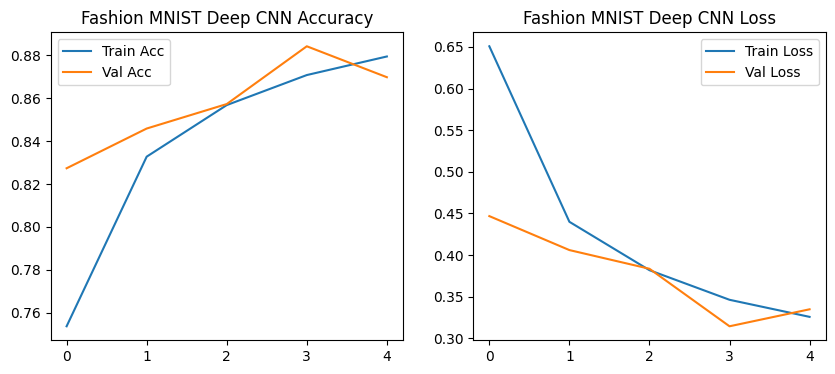

In [17]:
# Evaluation using Plots
test_loss, test_acc = model_deep.evaluate(x_test, y_test, verbose=2)
print(f"\nFashion MNIST Test accuracy (Deep CNN): {test_acc:.4f}")

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history_deep.history['accuracy'], label='Train Acc')
plt.plot(history_deep.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Fashion MNIST Deep CNN Accuracy')

plt.subplot(1,2,2)
plt.plot(history_deep.history['loss'], label='Train Loss')
plt.plot(history_deep.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Fashion MNIST Deep CNN Loss')

plt.show()